imports the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, adjusted_rand_score

Load the digits dataset

In [2]:
digits = load_digits()
x = digits.data
y = digits.target

Select three digits to form three classes (for example: 0, 1, and 2)

In [3]:
selected_digits = [0, 1, 2]
mask = np.isin(y, selected_digits)
x = x[mask]
y = y[mask]

 using t-SNE (uncomment to use t-SNE)

In [4]:

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(x)


Run KMeans for different k values and initial conditions

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_data)
    inertia.append(kmeans.inertia_)

 Plot the elbow curve

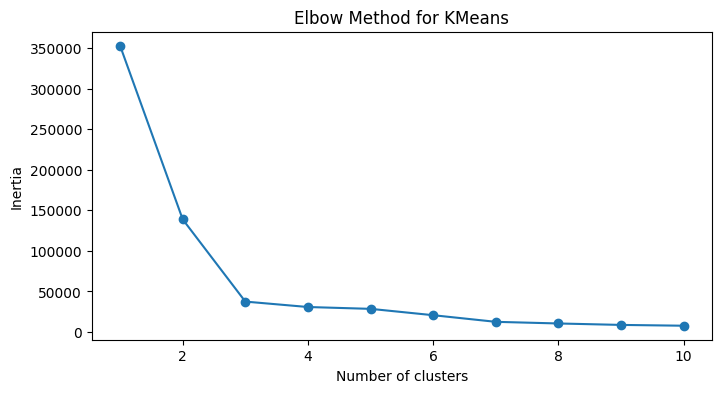

In [6]:

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

Determine the optimal number of clusters (elbow point)

In [7]:
optimal_k = 3


 Run KMeans with the optimal number of clusters

In [8]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tsne_data)
kmeans_y = kmeans.labels_

Run GMM with a specific initialization of sigma matrices

In [9]:
gmm = GaussianMixture(n_components=optimal_k, covariance_type='diag', random_state=42)
gmm.fit(tsne_data)

GaussianMixture(covariance_type='diag', n_components=3, random_state=42)

Evaluate if the cost function decreases

In [10]:
evaluated_cost = gmm.lower_bound_
print(f'Final Log Likelihood: {evaluated_cost:.2f}')

Final Log Likelihood: -7.38


Compare GMM results to true labels

In [11]:
gmm_y = gmm.predict(tsne_data)

Calculate accuracy and adjusted rand score

In [12]:
kmeans_accuracy = accuracy_score(y, kmeans_y)
gmm_accuracy = accuracy_score(y, gmm_y)
kmeans_ars = adjusted_rand_score(y, kmeans_y)
gmm_ars = adjusted_rand_score(y, gmm_y)

print(f"KMeans Accuracy: {kmeans_accuracy:.2f}, Adjusted Rand Index: {kmeans_ars:.2f}")
print(f"GMM Accuracy: {gmm_accuracy:.2f}, Adjusted Rand Index: {gmm_ars:.2f}")


KMeans Accuracy: 0.39, Adjusted Rand Index: 0.83
GMM Accuracy: 0.38, Adjusted Rand Index: 0.86


 Visualize the clustering results

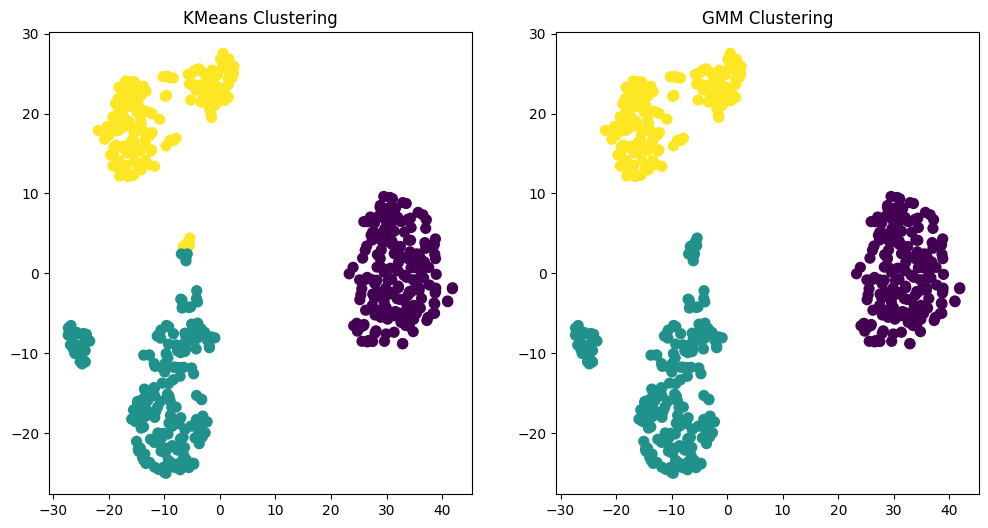

In [13]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_y, cmap='viridis', s=50)
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=gmm_y, cmap='viridis', s=50)
plt.title('GMM Clustering')

plt.show()
